# Nucleotide diversity

## Using REF as ancestral alleles

We are wondering how the ancestral allele inference effect the final treesequence object.
We are testing a *tstree* object created by imposing the reference allele as the 
ancestral allele. The effect is that there are more or less the same mutations as the
number of variants (while in the case of the ancestrall allele calculated with 
`est-sfs` we can see million of mutations). Let's start by loading data for this
*REF-based* treeseq object

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tskit

from tskitetude import get_project_dir
from tskitetude.helper import create_windows

In [2]:
ts_reference = tskit.load(str(get_project_dir() / "results-reference/background_samples/tsinfer/SMARTER-OA-OAR3-forward-0.4.10.focal.26.trees"))
ts_reference

I need to calculate nucleotide diversity *per site*. The only way to do this seems
to be calculating windows containing the SNPs an then calculating the nucleotide
diversity with the `tskit.TreeSequence.diversity` function. I've created a function
`create_windows` in `helper` module:

In [3]:
# the last index is a simply a 2 step starting from position 1
reference_diversity = ts_reference.diversity(windows=create_windows(ts_reference))[1::2]
reference_diversity[:10]

array([0.42888107, 0.48993439, 0.49405594, 0.2701865 , 0.45915964,
       0.24879865, 0.14893215, 0.39075449, 0.46029766, 0.48983504])

Now let's compare the nucleotide diversity calculated using vcftools: here's the 
command line to calculate nucleotide diversity *per site*:

```bash
cd results-reference/background_samples/focal
vcftools --gzvcf SMARTER-OA-OAR3-forward-0.4.10.focal.26.vcf.gz --out allsamples_pi --site-pi
```

The `allsamples_pi.sites.pi` is a *TSV* file with the positions and the nucleotide diversity. Read it with pandas:

In [4]:
vcftools_diversity = pd.read_csv(get_project_dir() / "results-reference/background_samples/focal/allsamples_pi.sites.pi", sep="\t")
vcftools_diversity.head()

,CHROM,POS,PI
0,26,209049,0.428881
1,26,268822,0.489934
2,26,285471,0.494056
3,26,405330,0.270187
4,26,528308,0.459160


Are this values similar?

In [5]:
np.isclose(reference_diversity, vcftools_diversity["PI"], atol=1e-6).all()

True

Calculate diversity using *branch*:

In [6]:
# the last index is a simply a 2 step starting from position 1
reference_diversity_branch = ts_reference.diversity(mode='branch', windows=create_windows(ts_reference))[1::2]
reference_diversity_branch[:10]

array([26.34394592, 60.60212185, 21.00527885, 19.92243044, 25.48782386,
       17.64541918, 32.80104135, 16.381481  , 51.06145221, 89.23446712])

Try to plot the tow different diversities with vcftools output:

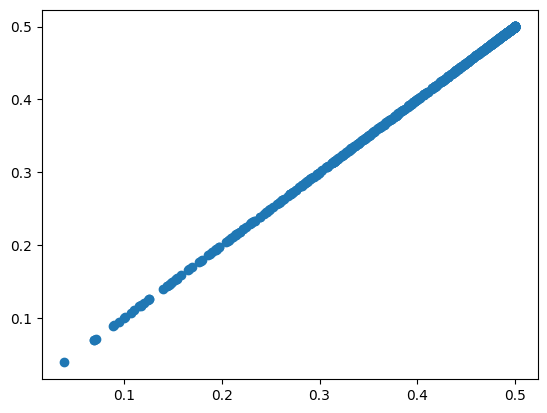

In [7]:
plt.scatter(reference_diversity, vcftools_diversity["PI"])

(0.0, 1000.0)

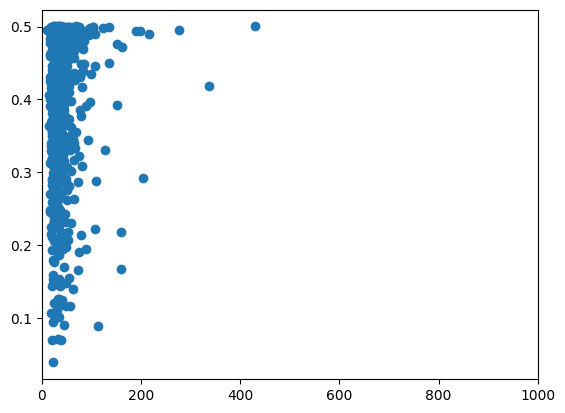

In [8]:
plt.scatter(reference_diversity_branch, vcftools_diversity["PI"])
plt.xlim(0, 1000)

## EST-SFS output as ancestral alleles

Can we calculate nucleotide diversity using the *tree files* generated by the pipeline
using the `est-sfs` output as ancestral alleles?

In [9]:
ts_estsfs = tskit.load(str(get_project_dir() / "results-estsfs/background_samples/tsinfer/SMARTER-OA-OAR3-forward-0.4.10.focal.26.trees"))
ts_estsfs

Same stuff as before

In [10]:
# the last index is a simply a 2 step starting from position 1
estsfs_diversity = ts_estsfs.diversity(windows=create_windows(ts_estsfs))[1::2]
estsfs_diversity[:10]

array([0.42888107, 0.48993439, 0.49405594, 0.2701865 , 0.45915964,
       0.24879865, 0.14893215, 0.39075449, 0.46029766, 0.48983504])

Are this values similar to the values calculated using VCFtools?

In [11]:
np.isclose(estsfs_diversity, vcftools_diversity["PI"], atol=1e-6).all()

True

So *nucleotide diversity* is the same in both cases (using the REF as ancestral allele and using the `est-sfs` output as ancestral allele). Calculate diversity using *branch*:

In [12]:
# the last index is a simply a 2 step starting from position 1
estsfs_diversity_branch = ts_estsfs.diversity(mode='branch', windows=create_windows(ts_estsfs))[1::2]
estsfs_diversity_branch[:10]

array([624.52643271, 624.52643271, 624.52643271, 412.42594145,
       412.09530421, 392.60494822, 381.37829267, 382.35883582,
       554.71395337, 554.71395337])

Try to plot the tow different diversities with vcftools output:

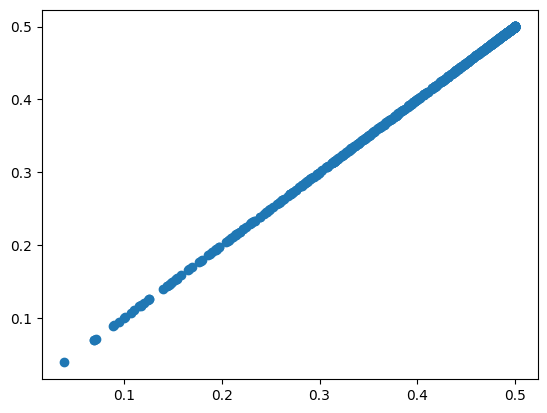

In [13]:
plt.scatter(estsfs_diversity, vcftools_diversity["PI"])

(0.0, 1000.0)

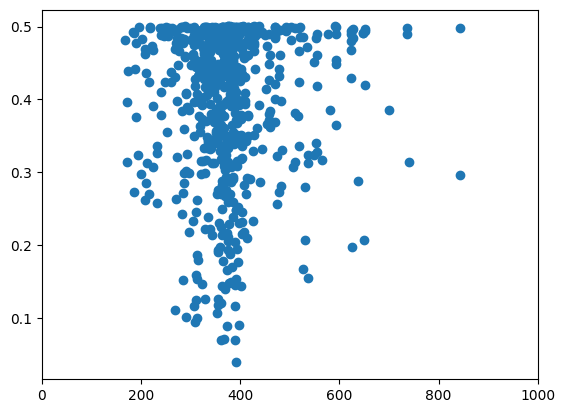

In [14]:
plt.scatter(estsfs_diversity_branch, vcftools_diversity["PI"])
plt.xlim(0, 1000)

## Compara output as ancestral alleles

Calculate nucleotide diversity using the *tree files* generated by the pipeline
using the `compara` approach as ancestral alleles.

In [15]:
ts_compara = tskit.load(str(get_project_dir() / "results-compara/background_samples/tsinfer/SMARTER-OA-OAR3-forward-0.4.10.focal.26.trees"))
ts_compara

Calculate nucleotide diversity as before:

In [16]:
# the last index is a simply a 2 step starting from position 1
compara_diversity = ts_compara.diversity(windows=create_windows(ts_compara))[1::2]
compara_diversity[:10]

array([0.42888107, 0.48993439, 0.49405594, 0.2701865 , 0.45915964,
       0.24879865, 0.14893215, 0.39075449, 0.46029766, 0.48983504])

Are this values similar to the values calculated using VCFtools?

In [17]:
np.isclose(compara_diversity, vcftools_diversity["PI"], atol=1e-6).all()

True

So *nucleotide diversity* is the same in both cases (using the REF as ancestral allele and using the `compara` as ancestral allele). Calculate diversity using *branch*:

In [18]:
# the last index is a simply a 2 step starting from position 1
compara_diversity_branch = ts_compara.diversity(mode='branch', windows=create_windows(ts_compara))[1::2]
compara_diversity_branch[:10]

array([480.2888314 , 357.66219101, 359.66089727, 362.93811695,
       380.69863508, 414.7738581 , 419.34958348, 419.14009411,
       419.14009411, 419.14009411])

Try to plot the tow different diversities with vcftools output:

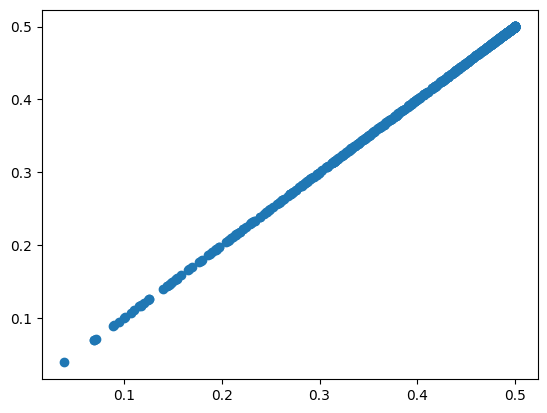

In [19]:
plt.scatter(compara_diversity, vcftools_diversity["PI"])

(0.0, 1000.0)

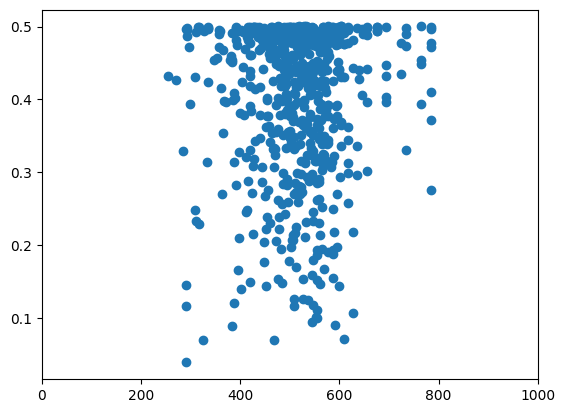

In [20]:
plt.scatter(compara_diversity_branch, vcftools_diversity["PI"])
plt.xlim(0, 1000)